In [1]:
import psycopg2
import config as creds
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [2]:
def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [3]:
# Connecting to DB
conn, cursor = connect()

Connected!


In [4]:
# Run SQL          
df_life_expect_all = pd.read_sql('SELECT * FROM le_all', conn)

df_life_expect_all.head()

,country,year_,status,life_expectancy,adult_mortality,population_,under_five_deaths,measles,gdp,hiv_aids,bmi,polio,basic_sanitation,drinking_water,emissions,sani_service
0,Afghanistan,2015,Developing,65.0,263.0,17.3,83,1154,17.2,0.1,19.1,6.0,40.71,52.39,0.172897,40.71
1,Afghanistan,2014,Developing,59.9,271.0,17.5,86,492,17.5,0.1,18.6,58.0,39.37,49.96,0.146236,39.37
2,Afghanistan,2013,Developing,59.9,268.0,17.7,89,430,17.7,0.1,18.1,62.0,38.06,47.56,0.185624,38.06
3,Afghanistan,2012,Developing,59.5,272.0,18.0,93,2787,17.9,0.1,17.6,67.0,36.75,45.19,0.259295,36.75
4,Afghanistan,2011,Developing,59.2,275.0,18.2,97,3013,18.2,0.1,17.2,68.0,35.46,42.84,0.296506,35.46


In [5]:
#Look for correlation - note any NaN values are automatically excluded.  Any non-numeric data type or columns in dataframe is ignored. 
df_life_expect_all.corr()

,year_,life_expectancy,adult_mortality,population_,under_five_deaths,measles,gdp,hiv_aids,bmi,polio,basic_sanitation,drinking_water,emissions,sani_service
year_,1.000000,0.119480,-0.060204,-0.047364,-0.031834,-0.029296,-0.045702,-0.145038,0.099752,0.008904,0.051385,0.070802,-0.020804,0.051385
life_expectancy,0.119480,1.000000,-0.724031,-0.487263,-0.233515,-0.107603,-0.483823,-0.554516,0.553096,0.421753,0.829565,0.825505,0.491501,0.829565
adult_mortality,-0.060204,-0.724031,1.000000,0.308385,0.115214,0.046726,0.299466,0.506185,-0.385657,-0.282786,-0.587338,-0.581314,-0.354438,-0.587338
population_,-0.047364,-0.487263,0.308385,1.000000,0.467968,0.181794,0.935655,0.186222,-0.527015,-0.196140,-0.462758,-0.370596,-0.274356,-0.462758
under_five_deaths,-0.031834,-0.233515,0.115214,0.467968,1.000000,0.477156,0.469756,0.051702,-0.238939,-0.175343,-0.279173,-0.186967,-0.154626,-0.279173
measles,-0.029296,-0.107603,0.046726,0.181794,0.477156,1.000000,0.188255,0.014102,-0.142173,-0.077571,-0.140714,-0.125257,-0.070740,-0.140714
gdp,-0.045702,-0.483823,0.299466,0.935655,0.469756,0.188255,1.000000,0.177281,-0.520190,-0.188741,-0.476382,-0.381796,-0.269846,-0.476382
hiv_aids,-0.145038,-0.554516,0.506185,0.186222,0.051702,0.014102,0.177281,1.000000,-0.242729,-0.152043,-0.378621,-0.400748,-0.183889,-0.378621
bmi,0.099752,0.553096,-0.385657,-0.527015,-0.238939,-0.142173,-0.520190,-0.242729,1.000000,0.227874,0.573321,0.528305,0.383715,0.573321
polio,0.008904,0.421753,-0.282786,-0.196140,-0.175343,-0.077571,-0.188741,-0.152043,0.227874,1.000000,0.439254,0.450444,0.268977,0.439254


<AxesSubplot:>

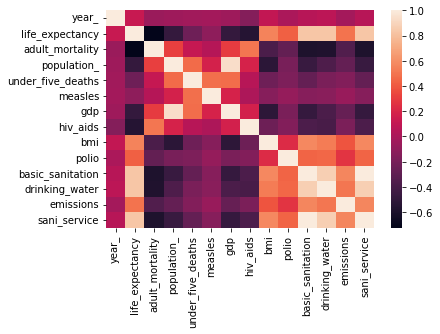

In [6]:
#Looking at heatmap for correlation/collinearity
corr = df_life_expect_all.corr()
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)

In [7]:
#drop unneccesary columns
life_expect_df = df_life_expect_all.drop(["country", "year_"], axis = 1)
life_expect_df

,status,life_expectancy,adult_mortality,population_,under_five_deaths,measles,gdp,hiv_aids,bmi,polio,basic_sanitation,drinking_water,emissions,sani_service
0,Developing,65.0,263.0,17.3,83,1154,17.2,0.1,19.1,6.0,40.71,52.39,0.172897,40.71
1,Developing,59.9,271.0,17.5,86,492,17.5,0.1,18.6,58.0,39.37,49.96,0.146236,39.37
2,Developing,59.9,268.0,17.7,89,430,17.7,0.1,18.1,62.0,38.06,47.56,0.185624,38.06
3,Developing,59.5,272.0,18.0,93,2787,17.9,0.1,17.6,67.0,36.75,45.19,0.259295,36.75
4,Developing,59.2,275.0,18.2,97,3013,18.2,0.1,17.2,68.0,35.46,42.84,0.296506,35.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,Developing,50.0,587.0,7.4,45,853,7.5,18.1,29.0,69.0,41.77,54.77,0.618665,41.77
1920,Developing,48.2,632.0,7.8,46,0,7.8,20.5,28.6,75.0,42.48,55.40,0.613916,42.48
1921,Developing,46.6,67.0,8.2,46,242,8.2,23.7,28.2,73.0,43.20,56.03,0.796350,43.20
1922,Developing,45.4,7.0,8.6,45,212,8.6,26.8,27.9,71.0,43.92,56.67,0.808688,43.92


In [8]:
# Converting the categorical variable into numerical

# Creating dummy variable
status = pd.get_dummies(life_expect_df['status'])

# Check what the dataset 'status' looks like
status

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1919,0,1
1920,0,1
1921,0,1
1922,0,1


In [9]:
# Dropping the first column from status dataset
status = pd.get_dummies(life_expect_df["status"], drop_first = True)

# Adding the status to the original dataframe
life_expect_df = pd.concat([life_expect_df, status], axis = 1)

# Dropping 'Status' as we have created the dummies for it
life_expect_df.drop(["status"], axis = 1, inplace = True)

life_expect_df

,life_expectancy,adult_mortality,population_,under_five_deaths,measles,gdp,hiv_aids,bmi,polio,basic_sanitation,drinking_water,emissions,sani_service,Developing
0,65.0,263.0,17.3,83,1154,17.2,0.1,19.1,6.0,40.71,52.39,0.172897,40.71,1
1,59.9,271.0,17.5,86,492,17.5,0.1,18.6,58.0,39.37,49.96,0.146236,39.37,1
2,59.9,268.0,17.7,89,430,17.7,0.1,18.1,62.0,38.06,47.56,0.185624,38.06,1
3,59.5,272.0,18.0,93,2787,17.9,0.1,17.6,67.0,36.75,45.19,0.259295,36.75,1
4,59.2,275.0,18.2,97,3013,18.2,0.1,17.2,68.0,35.46,42.84,0.296506,35.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,50.0,587.0,7.4,45,853,7.5,18.1,29.0,69.0,41.77,54.77,0.618665,41.77,1
1920,48.2,632.0,7.8,46,0,7.8,20.5,28.6,75.0,42.48,55.40,0.613916,42.48,1
1921,46.6,67.0,8.2,46,242,8.2,23.7,28.2,73.0,43.20,56.03,0.796350,43.20,1
1922,45.4,7.0,8.6,45,212,8.6,26.8,27.9,71.0,43.92,56.67,0.808688,43.92,1


In [10]:
# Checking for null values
print(life_expect_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   life_expectancy    1920 non-null   float64
 1   adult_mortality    1920 non-null   float64
 2   population_        1914 non-null   float64
 3   under_five_deaths  1924 non-null   int64  
 4   measles            1924 non-null   int64  
 5   gdp                1914 non-null   float64
 6   hiv_aids           1924 non-null   float64
 7   bmi                1914 non-null   float64
 8   polio              1924 non-null   float64
 9   basic_sanitation   1924 non-null   float64
 10  drinking_water     1924 non-null   float64
 11  emissions          1924 non-null   float64
 12  sani_service       1924 non-null   float64
 13  Developing         1924 non-null   uint8  
dtypes: float64(11), int64(2), uint8(1)
memory usage: 197.4 KB
None


In [11]:
# Checking for outliers
desc_df = life_expect_df.describe()

#Add +3 standard deviation metric
desc_df.loc["+3_std"] = desc_df.loc["mean"] + (desc_df.loc["std"] * 3)
desc_df.loc["-3_std"] = desc_df.loc["mean"] - (desc_df.loc["std"] * 3)

desc_df

,life_expectancy,adult_mortality,population_,under_five_deaths,measles,gdp,hiv_aids,bmi,polio,basic_sanitation,drinking_water,emissions,sani_service,Developing
count,1920.000000,1920.000000,1914.000000,1924.000000,1924.000000,1914.000000,1924.000000,1914.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000
mean,70.277969,157.849479,4.730721,39.186071,1874.199064,4.720167,1.370062,39.505695,84.241164,71.857214,77.990769,4.407753,71.857214,0.817568
std,9.081840,116.960845,4.342443,145.838632,10490.407182,4.301875,3.937609,20.402712,22.337715,29.839835,23.441538,5.319444,29.839835,0.386301
min,36.300000,1.000000,0.100000,0.000000,0.000000,0.100000,0.100000,2.000000,3.000000,4.560000,13.880000,0.020367,4.560000,0.000000
25%,64.675000,71.000000,1.600000,0.000000,0.000000,1.600000,0.100000,21.500000,82.000000,45.930000,60.490000,0.626705,45.930000,1.000000
50%,72.900000,138.000000,3.300000,3.000000,10.000000,3.300000,0.100000,45.700000,94.000000,85.955000,87.305000,2.559921,85.955000,1.000000
75%,76.025000,222.000000,6.900000,25.000000,246.500000,6.900000,0.600000,57.600000,97.000000,97.237500,97.922500,6.358911,97.237500,1.000000
max,89.000000,717.000000,28.100000,2000.000000,182485.000000,27.200000,49.100000,87.300000,99.000000,100.000000,100.000000,44.533806,100.000000,1.000000
+3_std,97.523489,508.732014,17.758049,476.701967,33345.420612,17.625792,13.182888,100.713829,151.254311,161.376719,148.315382,20.366086,161.376719,1.976470
-3_std,43.032448,-193.033056,-8.296607,-398.329825,-29597.022483,-8.185457,-10.442763,-21.702440,17.228018,-17.662291,7.666156,-11.550579,-17.662291,-0.341335


In [12]:
life_expect_df = life_expect_df.dropna()

In [13]:
# Checking for null values
print(life_expect_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 1923
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   life_expectancy    1910 non-null   float64
 1   adult_mortality    1910 non-null   float64
 2   population_        1910 non-null   float64
 3   under_five_deaths  1910 non-null   int64  
 4   measles            1910 non-null   int64  
 5   gdp                1910 non-null   float64
 6   hiv_aids           1910 non-null   float64
 7   bmi                1910 non-null   float64
 8   polio              1910 non-null   float64
 9   basic_sanitation   1910 non-null   float64
 10  drinking_water     1910 non-null   float64
 11  emissions          1910 non-null   float64
 12  sani_service       1910 non-null   float64
 13  Developing         1910 non-null   uint8  
dtypes: float64(11), int64(2), uint8(1)
memory usage: 210.8 KB
None


In [14]:
# Set random seed and split data into test and train sets
np.random.seed(0)
df_train, df_test = train_test_split(life_expect_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [15]:
df_train

,life_expectancy,adult_mortality,population_,under_five_deaths,measles,gdp,hiv_aids,bmi,polio,basic_sanitation,drinking_water,emissions,sani_service,Developing
550,78.0,161.0,2.8,62,1314,2.8,0.1,6.2,94.0,93.85,98.44,2.423233,93.85,1
1047,63.8,241.0,7.4,43,0,7.5,0.4,18.5,73.0,8.26,31.73,0.100718,8.26,1
1531,75.8,118.0,1.3,0,0,1.2,0.1,57.2,99.0,97.91,98.90,5.982344,97.91,0
1128,76.0,123.0,1.7,45,0,1.7,0.1,57.9,98.0,82.07,84.43,4.187212,82.07,1
377,79.8,86.0,0.8,2,6,0.8,0.1,61.2,93.0,97.81,91.87,4.437266,97.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,65.4,226.0,13.5,46,400,13.7,0.1,39.6,67.0,56.31,50.23,1.106688,56.31,1
1909,55.7,45.0,6.7,49,140,6.8,11.9,19.7,9.0,25.03,36.27,0.170448,25.03,1
1873,73.8,158.0,1.5,10,0,1.6,0.1,59.9,78.0,93.94,96.05,5.540041,93.94,1
793,82.4,5.0,0.9,0,0,1.0,0.1,6.2,91.0,98.78,100.00,6.269999,98.78,0


In [16]:
# Dividing the training data set into X and Y
y_train = df_train.pop("life_expectancy")
X_train = df_train

In [17]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     635.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:28   Log-Likelihood:                -3572.1
No. Observations:                1337   AIC:                             7170.
Df Residuals:                    1324   BIC:                             7238.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                61.3100      0.707     86.747      0.000      59.923      62.696
adult_mortality      -0.0176      0.001    -15.870      0.000      -0.020      -0.015
population_          -0.2226      0.065     -3.444      0.001      -0.349      -0.096
under_five_deaths    -0.0010      0.001     -1.157      0.248      -0.003       0.001
measles             2.35e-05   1.11e-05      2.117      0.034    1.73e-06    4.53e-05
gdp                   0.0289      0.065      0.442      0.659      -0.099       0.157
hiv_aids             -0.4146      0.027    -15.171      0.000      -0.468      -0.361
bmi                   0.0068      0.006      1.070      0.285      -0.006       0.019
polio                 0.0188      0.005      3.831      0.000       0.009       0.028
basic_sanitation      0.0391      0.004     10.300      0.000       0.032       0.047
drinking_water        0.1064      0.009     11.808      0.000       0.089       0.124
emissions             0.0099      0.021      0.464      0.643      -0.032       0.052
sani_service          0.0391      0.004     10.300      0.000       0.032       0.047
Developing           -3.1348      0.286    -10.948      0.000      -3.696      -2.573
==============================================================================
Omnibus:                       31.230   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.596
Skew:                          -0.031   Prob(JB):                     3.46e-15
Kurtosis:                       4.092   Cond. No.                     2.46e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.32e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
# Variance Inflation Factor or VIF is a quantitative value that says how much the feature variables are correlated 
# with each other. It is an extremely important parameter to test our linear model. 
# The formula for VIF is:VIF = 1/(1-Ri²)


# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,basic_sanitation,inf
11,sani_service,inf
9,drinking_water,51.08
4,gdp,18.29
1,population_,18.03
7,polio,16.52
6,bmi,8.31
12,Developing,6.10
0,adult_mortality,4.03
10,emissions,2.52


In [19]:
# Dropping highly correlated variables and insignificant variables one at a time 
X = X_train.drop("sani_service", axis=1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     635.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:29   Log-Likelihood:                -3572.1
No. Observations:                1337   AIC:                             7170.
Df Residuals:                    1324   BIC:                             7238.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                61.3100      0.70

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
# Calculating the VIFs again for the new model after dropping infant deaths

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,drinking_water,51.08
8,basic_sanitation,38.41
4,gdp,18.29
1,population_,18.03
7,polio,16.52
6,bmi,8.31
11,Developing,6.10
0,adult_mortality,4.03
10,emissions,2.52
2,under_five_deaths,1.89


In [21]:
X = X.drop("gdp", axis = 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     694.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:31   Log-Likelihood:                -3572.2
No. Observations:                1337   AIC:                             7168.
Df Residuals:                    1325   BIC:                             7231.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                61.3381      0.70

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,drinking_water,50.92
7,basic_sanitation,38.11
6,polio,16.46
5,bmi,8.30
10,Developing,6.03
0,adult_mortality,4.02
1,population_,3.92
9,emissions,2.52
2,under_five_deaths,1.86
4,hiv_aids,1.54


In [23]:
X = X.drop("emissions", axis = 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_4.summary())



                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     764.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:32   Log-Likelihood:                -3572.3
No. Observations:                1337   AIC:                             7167.
Df Residuals:                    1326   BIC:                             7224.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                61.3113      0.70

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,drinking_water,50.88
7,basic_sanitation,35.85
6,polio,16.46
5,bmi,8.26
9,Developing,5.85
0,adult_mortality,4.01
1,population_,3.91
2,under_five_deaths,1.86
4,hiv_aids,1.54
3,measles,1.39


In [25]:
X = X.drop("bmi", axis = 1)
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     848.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:33   Log-Likelihood:                -3572.9
No. Observations:                1337   AIC:                             7166.
Df Residuals:                    1327   BIC:                             7218.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                61.4771      0.68

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,drinking_water,48.91
6,basic_sanitation,34.87
5,polio,16.37
8,Developing,5.73
0,adult_mortality,3.99
1,population_,3.54
2,under_five_deaths,1.85
4,hiv_aids,1.54
3,measles,1.39


In [27]:
X = X.drop("under_five_deaths", axis = 1)
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     954.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:34   Log-Likelihood:                -3573.5
No. Observations:                1337   AIC:                             7165.
Df Residuals:                    1328   BIC:                             7212.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               61.4507      0.684  

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,drinking_water,47.84
5,basic_sanitation,34.20
4,polio,16.25
7,Developing,5.70
0,adult_mortality,3.98
1,population_,2.94
3,hiv_aids,1.54
2,measles,1.09


In [29]:
X = X.drop("measles", axis = 1)
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1089.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:36   Log-Likelihood:                -3575.1
No. Observations:                1337   AIC:                             7166.
Df Residuals:                    1329   BIC:                             7208.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               61.5165      0.684  

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,drinking_water,47.84
4,basic_sanitation,34.15
3,polio,16.21
6,Developing,5.70
0,adult_mortality,3.98
1,population_,2.85
2,hiv_aids,1.54


In [31]:
X = X.drop("drinking_water", axis = 1)
# Build a eigth fitted model
X_train_lm = sm.add_constant(X)
lr_8 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1127.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:37   Log-Likelihood:                -3642.8
No. Observations:                1337   AIC:                             7300.
Df Residuals:                    1330   BIC:                             7336.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               64.8575      0.656  

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,polio,13.71
4,basic_sanitation,9.53
5,Developing,5.70
0,adult_mortality,3.94
1,population_,2.69
2,hiv_aids,1.52


In [33]:
X = X.drop("polio", axis = 1)
# Build a ninth fitted model
X_train_lm = sm.add_constant(X)
lr_9 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1315.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:38   Log-Likelihood:                -3658.8
No. Observations:                1337   AIC:                             7330.
Df Residuals:                    1331   BIC:                             7361.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               66.8175      0.564  

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Developing,5.45
0,adult_mortality,3.75
1,population_,2.61
3,basic_sanitation,2.53
2,hiv_aids,1.52


In [35]:
X = X.drop("Developing", axis = 1)
# Build a tenth fitted model
X_train_lm = sm.add_constant(X)
lr_10 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1432.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:39   Log-Likelihood:                -3735.2
No. Observations:                1337   AIC:                             7480.
Df Residuals:                    1332   BIC:                             7506.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               63.6637      0.536  

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,adult_mortality,2.99
1,population_,2.09
3,basic_sanitation,1.77
2,hiv_aids,1.51


/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

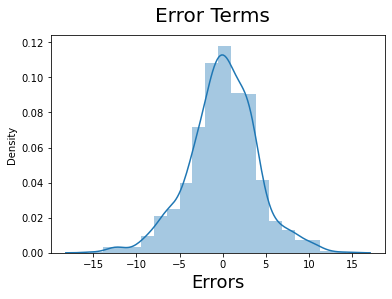

In [37]:
y_train_price = lr_10.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [38]:
df_test

,life_expectancy,adult_mortality,population_,under_five_deaths,measles,gdp,hiv_aids,bmi,polio,basic_sanitation,drinking_water,emissions,sani_service,Developing
752,65.9,221.0,5.3,1,0,5.6,0.4,42.4,95.0,83.28,90.90,2.348451,83.28,1
596,63.3,241.0,1.5,221,4347,1.7,1.2,16.4,7.0,6.18,25.83,0.091451,6.18,1
107,73.0,14.0,2.9,7,0,2.8,0.1,45.9,81.0,75.94,69.12,3.219792,75.94,1
1274,66.4,161.0,19.6,433,386,19.2,0.1,25.4,72.0,56.64,88.84,0.823008,56.64,1
190,59.3,251.0,7.3,39,288,7.4,1.3,24.1,8.0,14.51,56.81,0.456356,14.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,75.2,127.0,0.9,12,0,1.1,0.1,57.5,92.0,90.37,84.69,3.942491,90.37,1
202,68.3,225.0,17.0,1,10,16.3,0.5,21.1,95.0,63.03,91.43,0.851006,63.03,1
480,76.5,19.0,2.1,0,7,2.0,0.1,61.8,98.0,99.14,99.69,11.778604,99.14,0
1217,79.9,76.0,0.3,0,20,0.3,0.1,62.6,89.0,100.00,100.00,8.189552,100.00,0


In [39]:
y_test = df_test.pop("life_expectancy")
X_test = df_test

# Adding constant variable to test dataframe
X_test_m10 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m10 = X_test_m10.drop(["under_five_deaths", "measles", "gdp", "bmi", "polio", "drinking_water", 
                              "emissions", "sani_service", "Developing"], axis = 1) 
                            
# Making predictions using the final model
y_pred_m10 = lr_10.predict(X_test_m10)

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m10)

0.8027513295492161

In [42]:
from sklearn.metrics import mean_squared_error
score = r2_score(y_test, y_pred_m10)
print('r2 score is', score)
print('mean_sqrd_error is', mean_squared_error(y_test, y_pred_m10))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, y_pred_m10)))

r2 score is 0.8027513295492161
mean_sqrd_error is 15.875047073793262
root_mean_squared_error is 3.984350269967898


In [43]:
print( "Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.80


In [45]:
#create dataframe of actual vs predicted
df = pd.DataFrame({"Actual":y_test, "Predicted": y_pred_m10})
df.head()

,Actual,Predicted
752,65.9,71.098611
596,63.3,58.621755
107,73.0,75.067623
1274,66.4,64.484066
190,59.3,58.254997
